In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
file_path = '../assignmentData/club_games.csv'
df = pd.read_csv(file_path)

In [5]:
print(df.head())

print(df.info())

print(df.describe())

   game_id  club_id  own_goals  own_position      own_manager_name  \
0  2221751      431          1           NaN         Lutz Göttling   
1  2221755       83          3           NaN      Ralph Hasenhüttl   
2  2222597     3725          2           2.0  Stanislav Cherchesov   
3  2222627     2696          0          11.0        Andrey Kobelev   
4  2222658     2410          0           2.0        Leonid Slutski   

   opponent_id  opponent_goals  opponent_position opponent_manager_name  \
0           60               2                NaN     Christian Streich   
1         4795               0                NaN            Tomas Oral   
2          232               1                5.0            Unai Emery   
3         4128               2               10.0         Rustem Khuzin   
4          121               2               13.0          Dan Petrescu   

  hosting  is_win  
0    Home       0  
1    Home       1  
2    Home       1  
3    Home       0  
4    Home       0  
<class '

In [6]:
print(df.isnull().sum())

game_id                      0
club_id                      0
own_goals                    0
own_position             38908
own_manager_name          1484
opponent_id                  0
opponent_goals               0
opponent_position        38908
opponent_manager_name     1484
hosting                      0
is_win                       0
dtype: int64


In [7]:
missing_data_rows = df['own_position'].isnull().sum()
total_rows = len(df)
print('Numero totale di tuple: ', total_rows)
missing_data_percentage = (missing_data_rows / total_rows) * 100
print(f'Percentuale di righe con dati mancanti: {missing_data_percentage:.2f}%')

Numero totale di tuple:  130432
Percentuale di righe con dati mancanti: 29.83%


In [8]:
print(df.duplicated().sum())


0


In [9]:
Q1 = df['own_goals'].quantile(0.25)
Q3 = df['own_goals'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['own_goals'] < (Q1 - 1.5 * IQR)) | (df['own_goals'] > (Q3 + 1.5 * IQR))]
print(outliers)

        game_id  club_id  own_goals  own_position    own_manager_name  \
80      2224732     5817          6           1.0    Lars Söndergaard   
204     2244332     2783          7           NaN  Volodymyr Pyatenko   
294     2266637     9547          6           NaN     Martin de Groot   
306     2271187     1027          7           NaN      Phil Parkinson   
349     2321072       16          6           1.0        Jürgen Klopp   
...         ...      ...        ...           ...                 ...   
130244  4089261    53453          8           NaN     Vardan Minasyan   
130279  4104069      947         16           NaN        Kim Engström   
130296  4088602       16          6           NaN         Edin Terzic   
130303  4089249    37914          6           NaN      Vahe Gevorgyan   
130382  4157252      865         13           NaN   Thomas Thomasberg   

        opponent_id  opponent_goals  opponent_position opponent_manager_name  \
80             5724               1        

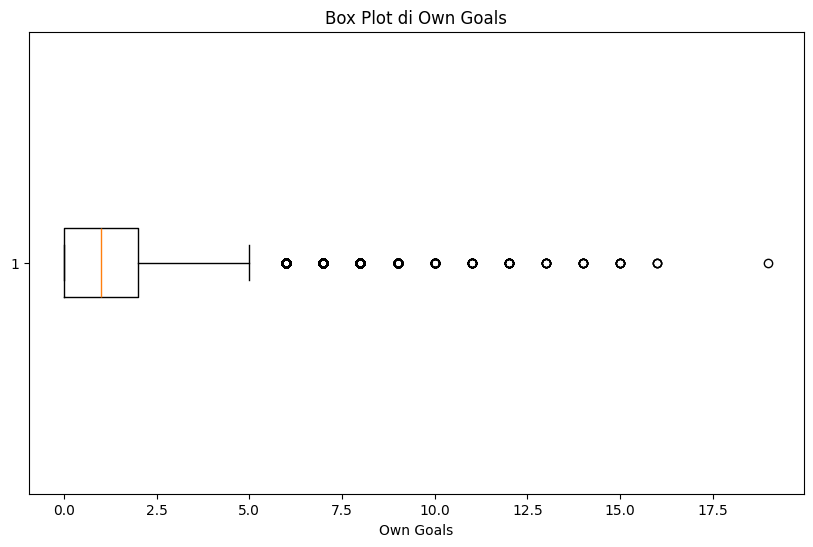

In [10]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['own_goals'].dropna(), vert=False)
plt.title('Box Plot di Own Goals')
plt.xlabel('Own Goals')
plt.show()

In [11]:
cleaned_file_path = '../cleanedData/club_gamesCleaned.csv'
if not os.path.exists(cleaned_file_path):
    df.to_csv(cleaned_file_path, index=False)
    print(f"File '{cleaned_file_path}' creato con successo.")
else:
    df.to_csv(cleaned_file_path, index=False, mode='w')

File '../cleanedData/club_gamesCleaned.csv' creato con successo.
